# Explore a NuGrid star model in iPython notebook

## How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [7]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    
#data_dir="/data/nugrid_vos/"    


ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 2 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

Let's now see what the model looks like by making some Kippenhahn diagrams

In [8]:
s=ms.star_log(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


## Data for MESA output

This data file is composed of two parts: s.header_attr and s.cols. 

data type  | contents
------------------|---------------------
`s.header_attr` | The header section seems include some intial defaults like what are shown when you run s.header_attr.
`s.cols`    | This section show different quanitities correspongding to a specific model or time. We can use these quantities to plot some figure we want.



## Examples
Below shown is an example how to plot ratio of C12 to O16 at surface of star as function of logarithm of star_age.

In [9]:
s.header_attr

{'burn_min1': 50.0,
 'burn_min2': 1000.0,
 'c12_boundary_limit': 0.0001,
 'h1_boundary_limit': 0.0001,
 'he4_boundary_limit': 0.0001,
 'initial_mass': 2.0,
 'initial_z': 0.02}

In [10]:
s.cols

{'burn_c': 59,
 'burn_n': 60,
 'burn_o': 61,
 'center_c12': 50,
 'center_h1': 48,
 'center_he4': 49,
 'center_mu': 46,
 'center_o16': 51,
 'center_ye': 47,
 'cno': 57,
 'conv_mx1_bot': 9,
 'conv_mx1_top': 8,
 'conv_mx2_bot': 11,
 'conv_mx2_top': 10,
 'delta_mass': 4,
 'envelope_mass': 32,
 'epsnuc_M_1': 16,
 'epsnuc_M_2': 17,
 'epsnuc_M_3': 18,
 'epsnuc_M_4': 19,
 'epsnuc_M_5': 20,
 'epsnuc_M_6': 21,
 'epsnuc_M_7': 22,
 'epsnuc_M_8': 23,
 'gravity': 42,
 'h1_boundary_lgRho': 27,
 'h1_boundary_lgT': 26,
 'h1_boundary_mass': 24,
 'h1_boundary_radius': 25,
 'he4_boundary_lgRho': 31,
 'he4_boundary_lgT': 30,
 'he4_boundary_mass': 28,
 'he4_boundary_radius': 29,
 'log_L': 38,
 'log_LH': 33,
 'log_LHe': 34,
 'log_LZ': 35,
 'log_Lnuc': 36,
 'log_R': 40,
 'log_Teff': 39,
 'log_abs_mdot': 5,
 'log_center_P': 45,
 'log_center_Rho': 44,
 'log_center_T': 43,
 'log_dt': 6,
 'log_g': 41,
 'luminosity': 37,
 'model_number': 1,
 'mx1_bot': 13,
 'mx1_top': 12,
 'mx2_bot': 15,
 'mx2_top': 14,
 'num_back

## Plot example

<IPython.core.display.Javascript object>


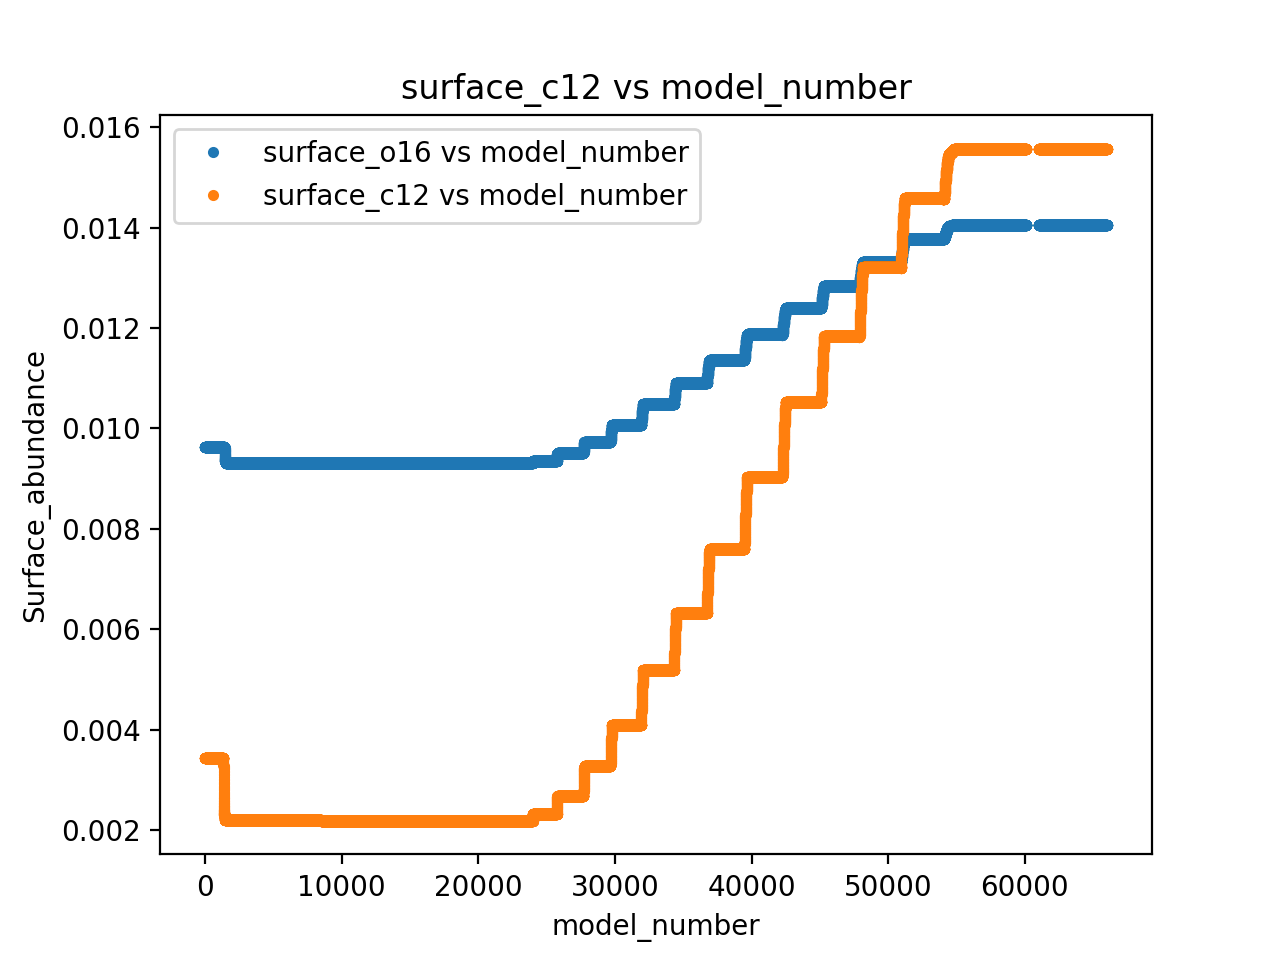

In [15]:
ifig=1;close(ifig);figure(ifig)
s.plot('model_number','surface_o16')
s.plot('model_number','surface_c12')
ylabel("Surface_abundance")

## About units in MESA data: 
If you want to check the unit of quantity in MESA data. MESA uses cgs units unless otherwise noted. If you want to see some dtails. You can see the file named const_def.f in $MESA original code under the directory /mesa/const/public/. All units of specific quantity are listed in forms of like this:

name | unit
----------------|-----------
`solar age` | (years)
`solar luminosity` |(erg s$^{-1}$)
`temperature` |(k)

In [ ]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn_CO(111,'model')

What's happening at the centre of the star? ...

In [ ]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

... and at the surface?

In [ ]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

In [ ]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 2 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [2]:
pt=mp.se(mass=2,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 2.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


## What quantities are available in this data type, and what are the units?
Each of the _se_ file sets (in fact each of the dozens of hdf5 files that make up the data set for one mass/metallicty combination, or stellar evolution track) has three types of data contained in them:

data type access | content 
----------------|---------
 `pt.se.hattrs` |  a header section that holds the _header attributes_, including units in the form of factors so that if applied with the quantities the result is in cgs units 
`pt.se.cattrs` | for each cycle (or time step) the _cycle attributes_ are a number of scalar global quantities, such as total mass or star age
`pt.se.dcols` | again, for each time step these are the vector quantities available, i.e. the data table columns; one of the data columns, _iso_massf_ is in fact a matrix where the matrix columns are different species, i.e. a radial vector of species vectors

In [3]:
pt.se.hattrs

[u'HDF5_version',
 u'SE_version',
 u'numcodev',
 u'codev',
 u'modname',
 u'mini',
 u'zini',
 u'rotini',
 u'overini',
 u'zisnb',
 u'age_unit',
 u'mass_unit',
 u'radius_unit',
 u'rho_unit',
 u'temperature_unit',
 u'dcoeff_unit']

In [4]:
pt.se.cattrs

[u'shellnb', u'age', u'deltat', u'total_mass']

In [5]:
pt.se.dcols

['mass', 'radius', 'rho', 'temperature', 'dcoeff', 'iso_massf']

We can use the `get` method to pull any of the data in

### Example
What is the unit of the temperature?

In [16]:
pt.get('temperature_unit')/1.e9

1.0

<IPython.core.display.Javascript object>


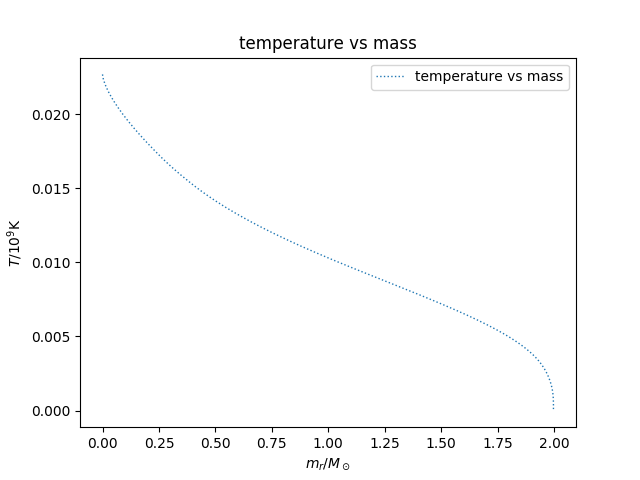

 reading ['mass']...100%0.0628838539124


In [20]:
ifig=122;close(ifig);figure(ifig)
pt.plot('mass','temperature',fname=1000,shape=':')
ylabel('$T / 10^9 \mathrm{K}$')
xlabel('$m_r/M_\odot$')

### Abundance profiles 

#### A number of isotopes in the H shell 
In the stellar evolution analysis we found that a H-burning shell inbetween thermal pulses could be found at cycle 18000. Let's plot a few isotopes that are being created or destroyed in this H-burning shell:

In [ ]:
# pt.abu_profile?

and the nuclides that are being created or destroyed in this part of the star:

In [ ]:
species=['H-1','He-4','C-12','C-13','N-14','O-16']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=18000, logy=True)
ylim(-7,0)
xlim(0.552,0.556)

#### Abundance profile at the time of formation of the partial-mix zone

In [ ]:
species=['H-1','C-12','C-13','N-14','Fe-56','Sr-86','Ba-138','Pb-206']

In [ ]:
ifig=121;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=45500, logy=True, colourblind=True)
ylim(-9,0)
xlim(0.603,0.6033)
title("Formation of the $^\mathsf{13}\mathsf{C}$ pocket: the partial H-$^\mathsf{12}\mathsf{C}$ zone")

In [ ]:
ifig=122;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=47222, logy=True, colourblind=False)
ylim(-9,0)
xlim(0.60312,0.6032)
title("Final s-process formed in $^\mathsf{13}\mathsf{C}$ pocket: end of intershell period")

### Isotopic abundance distribution in the C13 pocket

#### Static plots



In [ ]:
# help
#pt.iso_abund?

In [ ]:
ifig=123;close(ifig);figure(ifig)
pt.iso_abund(47221, stable=True,amass_range=[50,210], mass_range=[0.60312,0.6032], ylim=[-9, -2])


### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [ ]:
# pt.abu_chart?

In [ ]:
#ifig=1233;close(ifig);figure(ifig)
pt.abu_chart(47220,mass_range=[0.60312,0.6032], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)


You can extract the trajectory and initial abundances from this model at the key mass coordinate for use in a 1-zone PPN simulation in order to study, for example, the impact of a new rate

In [ ]:
pt.abund_at_masscoordinate(26100,0.57685,online=True)